In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!cp "/content/gdrive/My Drive/Urdu_mnist/dataset.zip" "/content/"

In [0]:
!cp "/content/gdrive/My Drive/Urdu_mnist/test_dataset.zip" "/content"

In [6]:
!unzip "/content/dataset.zip"

Streaming output truncated to the last 5000 lines.
  inflating: content/dataset/digit_1/writer351_pass08_digit1.bmp  
  inflating: content/dataset/digit_1/writer074_pass08_digit1.bmp  
  inflating: content/dataset/digit_1/writer127_pass03_digit1.bmp  
  inflating: content/dataset/digit_1/writer493_pass10_digit1.bmp  
  inflating: content/dataset/digit_1/writer512_pass07_digit1.bmp  
  inflating: content/dataset/digit_1/writer261_pass08_digit1.bmp  
  inflating: content/dataset/digit_1/writer361_pass10_digit1.bmp  
  inflating: content/dataset/digit_1/writer203_pass07_digit1.bmp  
  inflating: content/dataset/digit_1/writer184_pass02_digit1.bmp  
  inflating: content/dataset/digit_1/writer243_pass09_digit1.bmp  
  inflating: content/dataset/digit_1/writer479_pass03_digit1.bmp  
  inflating: content/dataset/digit_1/writer253_pass06_digit1.bmp  
  inflating: content/dataset/digit_1/writer354_pass09_digit1.bmp  
  inflating: content/dataset/digit_1/writer045_pass02_digit1.bmp  
  inflating

In [4]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt 
import sklearn
import imutils 
import os 
import numpy as np
from IPython.display import Image, display
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import  np_utils
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.layers import Conv2D,MaxPool2D,ZeroPadding2D,Convolution2D,MaxPooling2D
from keras import backend as K
from keras.layers import BatchNormalization
from keras.optimizers import SGD,RMSprop

Using TensorFlow backend.


In [7]:
digit_0=os.listdir("/content/content/dataset/digit_0")
digit_1=os.listdir("/content/content/dataset/digit_1")
digit_2=os.listdir("/content/content/dataset/digit_2")
digit_3=os.listdir("/content/content/dataset/digit_3")
digit_4=os.listdir("/content/content/dataset/digit_4")
digit_5=os.listdir("/content/content/dataset/digit_5")
digit_6=os.listdir("/content/content/dataset/digit_6")
digit_7=os.listdir("/content/content/dataset/digit_7")
digit_8=os.listdir("/content/content/dataset/digit_8")
digit_9=os.listdir("/content/content/dataset/digit_9")

plt.figure(figsize=(12,12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

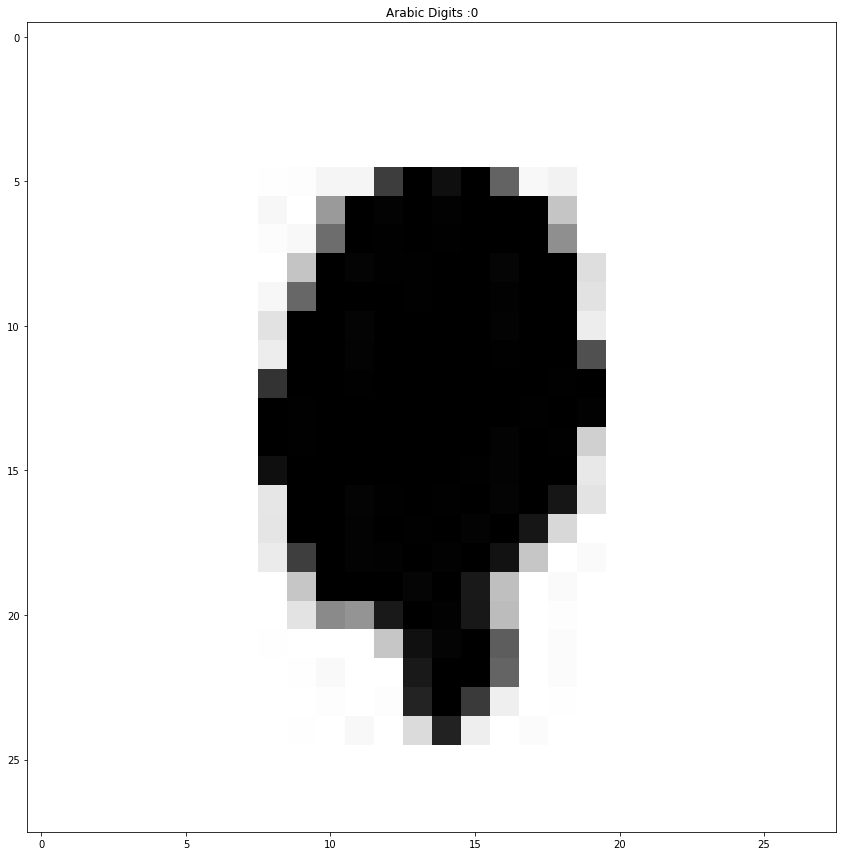

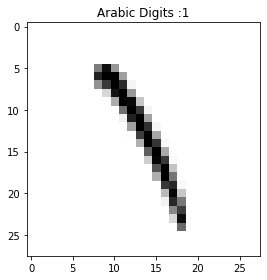

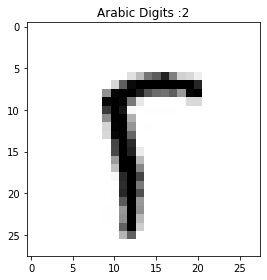

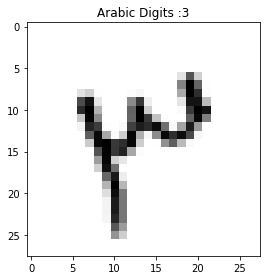

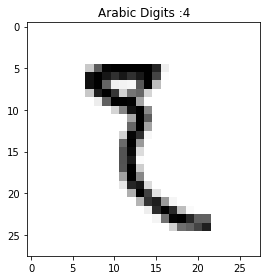

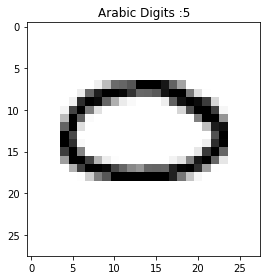

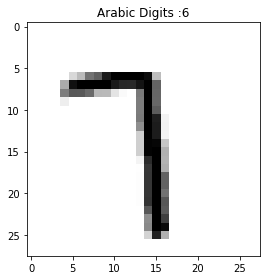

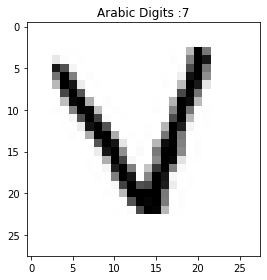

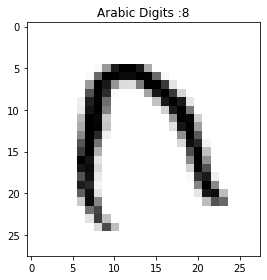

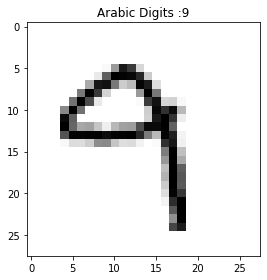

In [8]:
plt.figure(figsize=(12,12))
l=[digit_0,digit_1,digit_2,digit_3,digit_4,digit_5,digit_6,digit_7,digit_8,digit_9]
for j in range(10):
  a=l[j]
  for i in range(4):
      plt.plot()
      img=cv2.imread('/content/content/dataset/digit_' + str(j)+"/" + a[i])
      plt.imshow(img)
      plt.title('Arabic Digits :' + str(j))
      plt.tight_layout()
  plt.show()

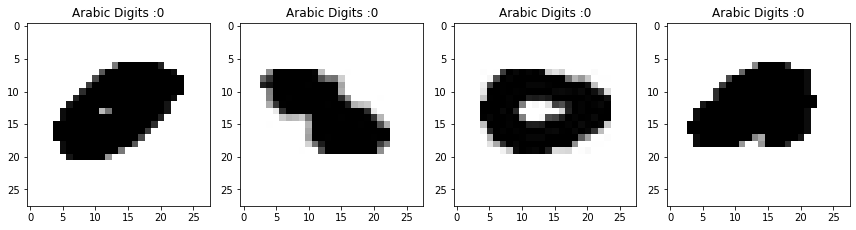

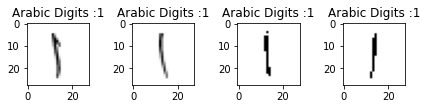

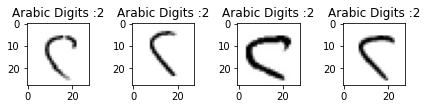

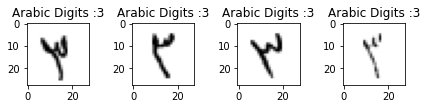

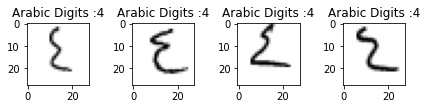

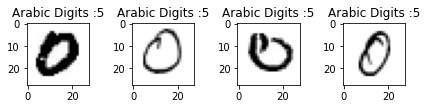

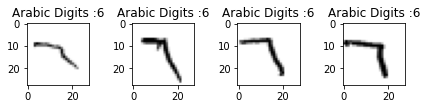

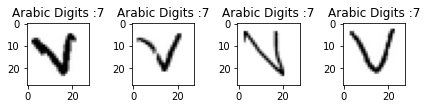

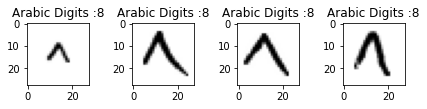

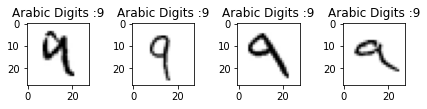

In [0]:
plt.figure(figsize=(12,12))
l=[digit_0,digit_1,digit_2,digit_3,digit_4,digit_5,digit_6,digit_7,digit_8,digit_9]
for j in range(10):
  a=l[j]
  for i in range(4):
      plt.subplot(1,4,i+1)
      img=cv2.imread('/content/content/dataset/digit_' + str(j)+"/" + a[i])
      plt.imshow(img)
      plt.title('Arabic Digits :' + str(j))
      plt.tight_layout()
  plt.show()

In [0]:
data=[]
labels=[]
for j in range(10):
  for i in range(len(l[j])):
        img=cv2.imread('/content/content/dataset/digit_' + str(j)+"/" + l[j][i])
        img_resize=cv2.resize(img,(28,28))
        img_gray=cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY)
        img_array=img_to_array(img_gray)
        data.append(img_array)
        labels.append(j)


In [0]:
image_data=np.array(data)
labels=np.array(labels)

In [0]:
idx=np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data=image_data[idx]
labels=labels[idx]

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(image_data,labels,test_size=0.4, random_state=101)

In [0]:
y_train=np_utils.to_categorical(y_train,num_classes=10)
y_test=np_utils.to_categorical(y_test,num_classes=10)

In [0]:
chanDim=-1
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
out=model.add(Flatten())

model.add(Dense(256, activation="relu"))
#model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=RMSprop(),metrics=['accuracy'], loss="categorical_crossentropy")



In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 5, 5, 64)          256       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 128)        

In [20]:
history=model.fit(X_train,y_train,epochs=20,batch_size=32, validation_data=(X_test,y_test))

Train on 36000 samples, validate on 24000 samples
Epoch 1/20
36000/36000 [==============================] - 17s 465us/step - loss: 0.0793 - accuracy: 0.9775 - val_loss: 0.0543 - val_accuracy: 0.9855
Epoch 2/20
36000/36000 [==============================] - 9s 253us/step - loss: 0.0361 - accuracy: 0.9901 - val_loss: 0.0388 - val_accuracy: 0.9896
Epoch 3/20
36000/36000 [==============================] - 10s 273us/step - loss: 0.0280 - accuracy: 0.9919 - val_loss: 0.0546 - val_accuracy: 0.9863
Epoch 4/20
36000/36000 [==============================] - 10s 265us/step - loss: 0.0224 - accuracy: 0.9941 - val_loss: 0.0409 - val_accuracy: 0.9906
Epoch 5/20
36000/36000 [==============================] - 10s 266us/step - loss: 0.0167 - accuracy: 0.9958 - val_loss: 0.0478 - val_accuracy: 0.9901
Epoch 6/20
36000/36000 [==============================] - 9s 255us/step - loss: 0.0148 - accuracy: 0.9961 - val_loss: 0.3492 - val_accuracy: 0.9236
Epoch 7/20
36000/36000 [==============================] - 

In [22]:
from keras import backend as K
for l in range(len(model.layers)):
    print(l, model.layers[l])

0 <keras.layers.convolutional.Conv2D object at 0x7fd8b024a908>
1 <keras.layers.pooling.MaxPooling2D object at 0x7fd8b024aac8>
2 <keras.layers.normalization.BatchNormalization object at 0x7fd8b038b908>
3 <keras.layers.convolutional.Conv2D object at 0x7fd8b024ab70>
4 <keras.layers.pooling.MaxPooling2D object at 0x7fd8b025a9b0>
5 <keras.layers.normalization.BatchNormalization object at 0x7fd8b0246f60>
6 <keras.layers.convolutional.Conv2D object at 0x7fd8b024ada0>
7 <keras.layers.pooling.MaxPooling2D object at 0x7fd8b0180128>
8 <keras.layers.normalization.BatchNormalization object at 0x7fd8b0168940>
9 <keras.layers.core.Flatten object at 0x7fd8b0194128>
10 <keras.layers.core.Dense object at 0x7fd8b0127f98>
11 <keras.layers.core.Dense object at 0x7fd8b0131b38>


In [0]:
getFeature = K.function([model.layers[0].input, K.learning_phase()],
                        [model.layers[9].output])

In [0]:
exTrain3000 = getFeature([X_train[:3000], 0])[0]
exTest1000 = getFeature([X_test[:1000], 0])[0]

In [0]:
y_train3000 = y_train[:3000].reshape(y_train[:3000].shape[0],)
y_test1000 = y_test[:1000]

In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':['rbf'], 
              'C':[1, 10, 100, 1000],
              'gamma':[1e-3, 1e-4]}
clf = GridSearchCV(SVC(), parameters)
clf.fit(exTrain3000, y_train3000)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [32]:
svmclf = clf.best_estimator_
svmclf.fit(exTrain3000, y_train3000)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def print_cmx(y_true, y_pred):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    plt.figure(figsize = (10,7))
    sn.heatmap(df_cmx, annot=True)
    plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [36]:


y_testSVM = svmclf.predict(exTest1000)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#print_cmx(y_test1000.T[0], y_testSVM)
print(classification_report(y_test1000, y_testSVM))
print("Accuracy: {0}".format(accuracy_score(y_test1000, y_testSVM)))



              precision    recall  f1-score   support

           0       0.99      1.00      1.00       110
           1       0.98      1.00      0.99        87
           2       0.97      0.99      0.98       104
           3       1.00      0.99      0.99        90
           4       1.00      0.98      0.99       111
           5       0.99      0.97      0.98        96
           6       1.00      0.99      0.99        99
           7       0.99      0.99      0.99       103
           8       0.99      0.99      0.99       112
           9       0.98      0.99      0.98        88

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

Accuracy: 0.989


Text(0.5, 1.0, 'Accuracy Curves')

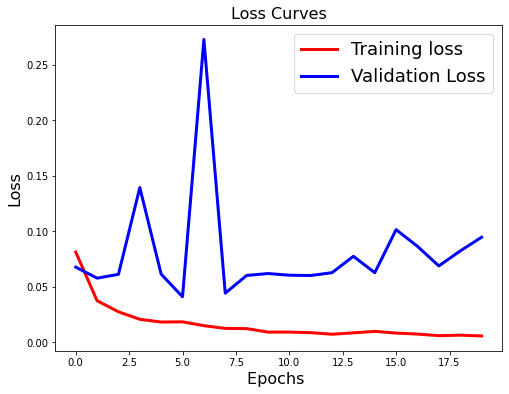

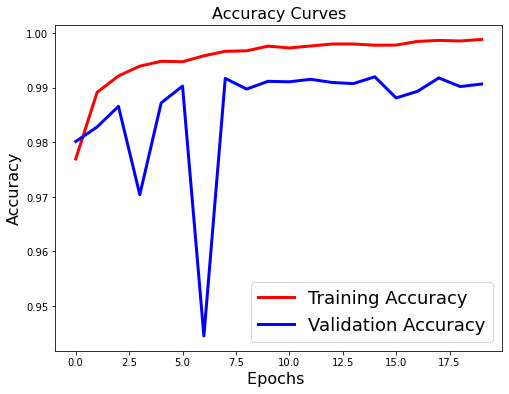

In [0]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

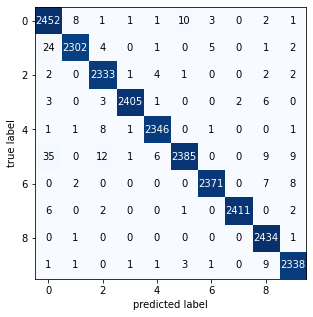

In [0]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [0]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.50)
acc=accuracy_score(y_test,y_pred)
print("Accuracy :", acc)
print("Classification report " , classification_report(y_test,y_pred))

Accuracy : 0.990625
Classification report                precision    recall  f1-score   support

           0       0.97      0.99      0.98      2479
           1       0.99      0.98      0.99      2339
           2       0.99      0.99      0.99      2345
           3       1.00      0.99      1.00      2420
           4       0.99      0.99      0.99      2359
           5       0.99      0.97      0.98      2457
           6       1.00      0.99      0.99      2388
           7       1.00      1.00      1.00      2422
           8       0.99      1.00      0.99      2436
           9       0.99      0.99      0.99      2355

   micro avg       0.99      0.99      0.99     24000
   macro avg       0.99      0.99      0.99     24000
weighted avg       0.99      0.99      0.99     24000
 samples avg       0.99      0.99      0.99     24000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
